# Data Mining & Machine Learning Final Project

## Group Members:
1) Sumanth Vuppu - A20550921
2) Kumaresh Pendiyala Venkatesh - A20542224
3) Sannidhi Rao Ambaragonda  - A20550030
4) Sonali Sahu Patel - A20539250

#### Importing Libraries

In [3]:
import re
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats.contingency import association
from sklearn.neural_network import MLPClassifier
from sklearn import tree, neighbors, preprocessing
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import cross_validate, KFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from scipy.stats import zscore, median_abs_deviation, chi2_contingency
from sklearn.feature_selection import f_classif, SelectKBest, SequentialFeatureSelector
from sklearn.metrics import (accuracy_score, precision_score, f1_score, roc_auc_score, make_scorer, recall_score, silhouette_score, 
confusion_matrix)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier)

import warnings
warnings.filterwarnings("ignore")

#### Reading The CSV File

In [2]:
df = pd.read_csv("train.csv")

# print out and display dataframe as tables in HTML
display(HTML(df.head().to_html()))
display(HTML(df.tail().to_html()))

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


##### Describing All Columns

In [3]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


### Data Preprocessing

#### Data Cleaning

In [4]:
# strip column names
df = df.rename(columns=lambda x: x.strip())

# create a copy first
df1=df.copy(deep=True)
print(df1.shape)

# Remove the coulumns (ID,Name, SSN) as these are personal identifiers and we already have customer_ID to identify it
cols_to_drop =['ID', 'Name', 'SSN']
df1=df1.drop(columns=cols_to_drop , axis=1)

(100000, 28)


In [5]:
print(df1['Type_of_Loan'].nunique())

# Drop column 'Type_of_Loan' as we have 6260 unique columns
df1=df1.drop('Type_of_Loan' , axis=1)

6260


##### Checking For Duplicate Rows

In [6]:
duplicate_df=df1[df1.duplicated()]

display(HTML(duplicate_df.head().to_html()))

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


##### Checking For Missing Values

In [7]:
cols = df1.columns
print('\nColumnName, DataType, MissingValues')
for i in cols:
        print(i, ',', df1[i].dtype, ',', df1[i].isnull().sum())

# Calculate percentage of missing values in the entire DataFrame
percentage_missing = round(df1.isna().sum().sum() / df1.size * 100, 1)
print("\nPercentage of Missing Values in the DataFrame: {}%".format(percentage_missing))


ColumnName, DataType, MissingValues
Customer_ID , object , 0
Month , object , 0
Age , object , 0
Occupation , object , 0
Annual_Income , object , 0
Monthly_Inhand_Salary , float64 , 15002
Num_Bank_Accounts , int64 , 0
Num_Credit_Card , int64 , 0
Interest_Rate , int64 , 0
Num_of_Loan , object , 0
Delay_from_due_date , int64 , 0
Num_of_Delayed_Payment , object , 7002
Changed_Credit_Limit , object , 0
Num_Credit_Inquiries , float64 , 1965
Credit_Mix , object , 0
Outstanding_Debt , object , 0
Credit_Utilization_Ratio , float64 , 0
Credit_History_Age , object , 9030
Payment_of_Min_Amount , object , 0
Total_EMI_per_month , float64 , 0
Amount_invested_monthly , object , 4479
Payment_Behaviour , object , 0
Monthly_Balance , object , 1200
Credit_Score , object , 0

Percentage of Missing Values in the DataFrame: 1.6%


In [8]:
# Displaying only Missing values
for i in df1.columns:    
    if df1[i].isnull().sum() > 0:
        print(i, ',', df1[i].dtype, df1[i].isnull().sum())

Monthly_Inhand_Salary , float64 15002
Num_of_Delayed_Payment , object 7002
Num_Credit_Inquiries , float64 1965
Credit_History_Age , object 9030
Amount_invested_monthly , object 4479
Monthly_Balance , object 1200


##### Checking Columns Which Have Invalid Character '_'

In [9]:
cols = df1.columns

for col in cols:
    if df1[col].apply(lambda x: isinstance(x, str) and x.endswith("_")).any():
        print(f"Column '{col}' contains values ending with an underscore.")

Column 'Age' contains values ending with an underscore.
Column 'Occupation' contains values ending with an underscore.
Column 'Annual_Income' contains values ending with an underscore.
Column 'Num_of_Loan' contains values ending with an underscore.
Column 'Num_of_Delayed_Payment' contains values ending with an underscore.
Column 'Changed_Credit_Limit' contains values ending with an underscore.
Column 'Credit_Mix' contains values ending with an underscore.
Column 'Outstanding_Debt' contains values ending with an underscore.
Column 'Amount_invested_monthly' contains values ending with an underscore.
Column 'Monthly_Balance' contains values ending with an underscore.


##### Dealing With Underscore By Striping _ If The Value Contains _ With The Number

In [10]:
cols = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Outstanding_Debt",]

for col in cols:    
    if not df1[col].isnull().all():
        df1[col] = df1[col].apply(lambda x: x.rstrip('_') if isinstance(x, str) and x.endswith("_") else x)

##### Identifying String Columns Which Are Having '_'

In [11]:
cols = ['Occupation', 'Credit_Mix', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']

for col in cols:
    group_sizes = df1.groupby([col]).size()
    if any('_' in str(index) for index in group_sizes.index):
        mask = pd.Series(group_sizes.index.str.contains('_'))
        mask = mask.fillna(False)
        print(group_sizes[mask.values])
        print()

Occupation
Media_Manager    6232
_______          7062
dtype: int64

Credit_Mix
_    20195
dtype: int64

Amount_invested_monthly
__10000__    4305
dtype: int64

Monthly_Balance
__-333333333333333333333333333__    9
dtype: int64

Changed_Credit_Limit
_    2091
dtype: int64



##### Removing All Invalid Values With '_'

In [12]:
# Media_Manager is valid value.

df1['Occupation'] = df1['Occupation'].replace("_______", pd.NA)
df1['Changed_Credit_Limit'] = df1['Changed_Credit_Limit'].replace("_", 'NaN')
df1['Credit_Mix'] = df1['Credit_Mix'].replace("_", pd.NA)
df1['Amount_invested_monthly'] = df1['Amount_invested_monthly'].replace("__10000__", 'NaN')
df1['Monthly_Balance'] = df1['Monthly_Balance'].replace("__-333333333333333333333333333__", 'NaN')

# checking if any underscore still exists
for col in cols:
    if df1[col].apply(lambda x: isinstance(x, str) and x.endswith("_")).any():
        print(f"Column '{col}' contains values ending with an underscore.")

##### Converting Object Type Columns Which Must Be Numerical (Float/Int Type)

In [13]:
cols = ['Age','Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_Credit_Inquiries', 
        'Annual_Income', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month', 
        'Amount_invested_monthly', 'Monthly_Balance']

for col in cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

##### Dealing With Invalid Negative Values In The Numeric Columns

In [14]:
cols = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan', 'Num_of_Delayed_Payment']

for col in cols:
      df1.loc[df1[col] < 0, col] = pd.NA

##### Filling Numeric Column Null Values By Median Of The Column Grouped-by Customer_Id

In [15]:
cols = df1.select_dtypes(include=['number']).columns

for col in cols:
    median_by_id = df1.groupby('Customer_ID')[col].median()    
    df1[col] = df1.apply(lambda row: median_by_id[row['Customer_ID']] if pd.isna(row[col]) else row[col], axis=1)
    print(f"Number of null values in {col}: {df1[col].isnull().sum()}")

Number of null values in Age: 0
Number of null values in Annual_Income: 0
Number of null values in Monthly_Inhand_Salary: 0
Number of null values in Num_Bank_Accounts: 0
Number of null values in Num_Credit_Card: 0
Number of null values in Interest_Rate: 0
Number of null values in Num_of_Loan: 0
Number of null values in Delay_from_due_date: 0
Number of null values in Num_of_Delayed_Payment: 0
Number of null values in Changed_Credit_Limit: 0
Number of null values in Num_Credit_Inquiries: 0
Number of null values in Outstanding_Debt: 0
Number of null values in Credit_Utilization_Ratio: 0
Number of null values in Total_EMI_per_month: 0
Number of null values in Amount_invested_monthly: 0
Number of null values in Monthly_Balance: 0


##### Identifying Invalid Characters In `Payment_Behaviour` Column

In [16]:
# Define a regular expression pattern to match special characters
special_chars_pattern = re.compile(r'[^\w\s]')

# Find groups with special characters in 'Payment_Behaviour'
groups_with_special_chars = df1['Payment_Behaviour'].apply(lambda x: bool(special_chars_pattern.search(x)))

# Filter and display the group sizes of 'Payment_Behaviour' with special characters
print(df1[groups_with_special_chars].groupby('Payment_Behaviour').size())

# Dealing with categorical values (noisy data)
df1['Payment_Behaviour'] = df1['Payment_Behaviour'].replace("!@9#%8", pd.NA)

Payment_Behaviour
!@9#%8    7600
dtype: int64


##### Filling Missing/NA Categorical Value With Mode Grouped By Customer_ID (Most Frequent value grouping by customer_ID)

In [17]:
# Filling Missing/NA Categorical Value With Mode Grouped By Customer_ID (Most Frequent value grouping by customer_ID)
cols = ['Occupation','Credit_Mix', 'Credit_History_Age', 'Payment_Behaviour']

for column in cols:
    mode_by_id = df1.groupby('Customer_ID')[column].transform(lambda x: x.mode()[0])
    df1[column] = df1[column].fillna(mode_by_id)
    print(f"Number of null values in {column}: {df1[column].isnull().sum()}")

Number of null values in Occupation: 0
Number of null values in Credit_Mix: 0
Number of null values in Credit_History_Age: 0
Number of null values in Payment_Behaviour: 0


##### Converting Credit_History_Age Categorical Data To Numeric

In [18]:
def convert_to_months(age_str):
    years, months = age_str.split(' and ')
    years = int(years.split(' ')[0])
    months = int(months.split(' ')[0])
    return years * 12 + months

df1['Credit_History_Age_Months'] = df1['Credit_History_Age'].apply(convert_to_months)
df1 = df1.drop('Credit_History_Age', axis=1)
print(df1['Credit_History_Age_Months'])

display(HTML(df1.head().to_html()))

0        265
1        265
2        267
3        268
4        269
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Name: Credit_History_Age_Months, Length: 100000, dtype: int64


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,-1,6.5,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265
2,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,6,6.5,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269


##### Mapping Months To Numerical As It Is Ordinal Column

##### Checking If Any Null Values Are Present After Preprocessing

In [19]:
monthMapping={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8
}

df1['Month'] = df1['Month'].map(monthMapping)
display(HTML(df1.head().to_html()))

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,CUS_0xd40,1,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
1,CUS_0xd40,2,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,-1,6.5,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265
2,CUS_0xd40,3,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267
3,CUS_0xd40,4,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
4,CUS_0xd40,5,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,6,6.5,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269


In [20]:
df1.isnull().sum()

Customer_ID                  0
Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

##### Displaying The Percentage Of Outliers For Each Numerical Column Based On Z-Score Method

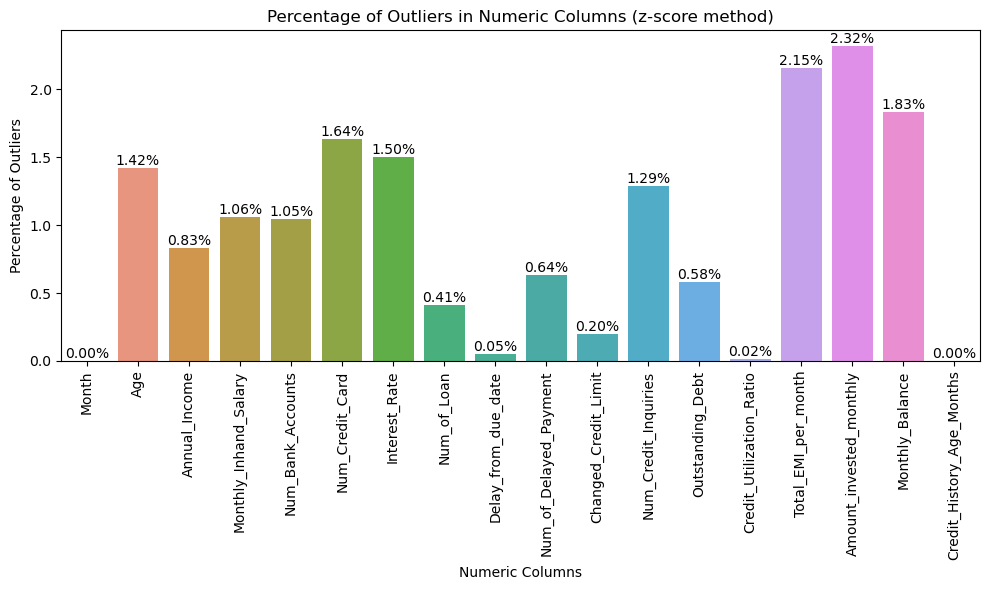

In [21]:
#Percentage of outliers in Numeric column

# Step 1: Identify numeric columns
numeric_columns = df1.select_dtypes(include=['number']).columns

# Step 2: Calculate z-scores for each numeric column
z_scores = df1[numeric_columns].apply(zscore)

# Step 3: Calculate percentage of outliers for each numeric column
outlier_percentages = {}
for column in numeric_columns:
    # Identify outliers based on absolute z-score threshold (e.g., 3)
    outliers = z_scores[abs(z_scores[column]) > 3][column]
    percentage_outliers = (len(outliers) / len(df1)) * 100
    
    # Store the percentage of outliers for the column
    outlier_percentages[column] = percentage_outliers

# Step 4: Plot the percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(outlier_percentages.keys()), y=list(outlier_percentages.values()))
plt.title('Percentage of Outliers in Numeric Columns (z-score method)')
plt.xlabel('Numeric Columns')
plt.ylabel('Percentage of Outliers')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate each bar with its respective percentage value
for i, percentage in enumerate(outlier_percentages.values()):
    ax.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

##### Replacing The Noisy Data With Median Of The Column Grouped By Customerid

In [22]:
# Dealing with Noisy Data in numeric columns (outliers which are noisy)
cols = df1.select_dtypes(include=['number']).columns

# Create an empty DataFrame to store flagged outliers
outliers_df = pd.DataFrame(columns=['Customer_ID'] + cols)

# Replace outliers with median_by_cid for each column
for col in cols:
    # Calculate the median for each column by Customer ID
    median_by_cid = df1.groupby('Customer_ID')[col].transform('median')
    median_col = df1[col].median()
    
    # Calculate MAD
    mad_col = np.abs(df1[col] - median_col).median()

    # Define Outlier Threshold
    threshold = 3 * mad_col
    df1[col] = np.where(np.abs(df1[col] - median_col) > threshold, median_by_cid, df1[col])

##### Checking For Outliers After Handling Noisy Data

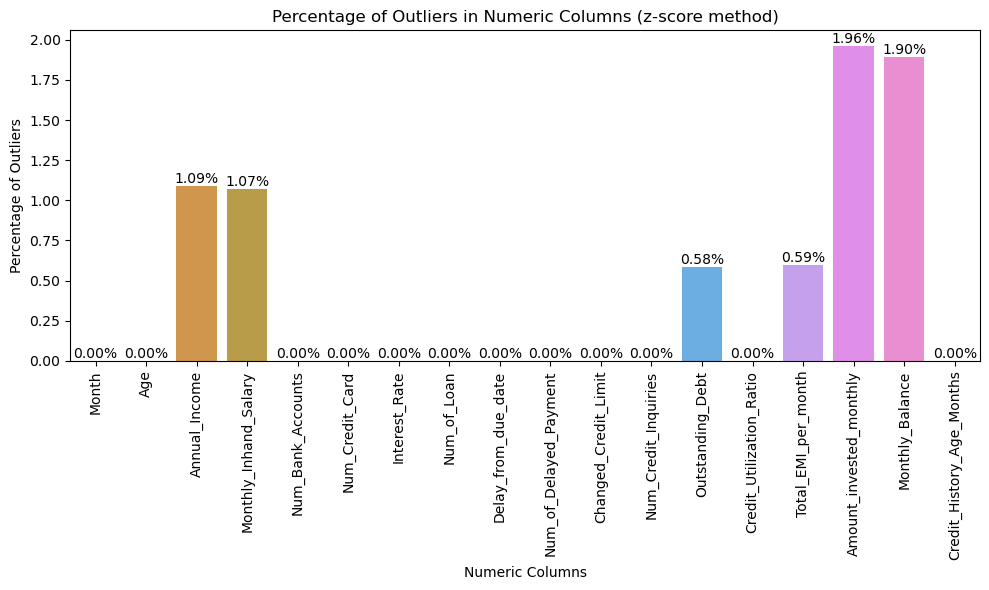

In [23]:
# Step 1: Identify numeric columns
numeric_columns = df1.select_dtypes(include=['number']).columns

# Step 2: Calculate z-scores for each numeric column
z_scores = df1[numeric_columns].apply(zscore)


# Step 3: Calculate percentage of outliers for each numeric column
outlier_percentages = {}
for column in numeric_columns:
    # Identify outliers based on absolute z-score threshold (e.g., 3)
    outliers = z_scores[abs(z_scores[column]) > 3][column]
    percentage_outliers = (len(outliers) / len(df1)) * 100
    
    # Store the percentage of outliers for the column
    outlier_percentages[column] = percentage_outliers

# Step 4: Plot the percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(outlier_percentages.keys()), y=list(outlier_percentages.values()))
plt.title('Percentage of Outliers in Numeric Columns (z-score method)')
plt.xlabel('Numeric Columns')
plt.ylabel('Percentage of Outliers')
plt.xticks(rotation=90)
plt.tight_layout()

# Annotate each bar with its respective percentage value
for i, percentage in enumerate(outlier_percentages.values()):
    ax.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [24]:
df2 = df1.copy(deep=True)
df2 = df2.drop('Customer_ID',axis=1)

### Data Transformation

##### Normalizing Dataset For Outlier Detection

In [25]:
## Prepare a numerical feature matrix, better to be normalized

# convert all nominal variables to binary variables
df_Num=df2.copy(deep=True) 
# create new binary columns
cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

for col in cols:
    df_dummies = pd.get_dummies(df_Num[[col]], dtype=float)
    df_Num = df_Num.join(df_dummies)
    df_Num = df_Num.drop(col, axis=1)

display(df_Num.head())

display('Data Example:',HTML(df_Num.head().to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
scaler = MinMaxScaler(feature_range=(1,5))
cols_numeric = df_Num.select_dtypes(include=numerics).columns.tolist()

# min-max normalization to scale [1, 5]
df_Num[cols_numeric] = scaler.fit_transform(df_Num[cols_numeric])

df_Num=df_Num.drop("Credit_Score",axis=1)
display(HTML(df_Num.head().to_html()))

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,6.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


'Data Example:'

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,Good,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,6.5,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,Good,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,Good,267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Good,268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.5,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Good,269.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1.000000,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.474074,2.000000,2.817439,1.941176,1.64808,2.093009,1.009169,1.283985,1.686601,3.620347,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0
1,1.571429,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.237037,1.928571,2.817439,1.941176,1.64808,2.913627,1.009169,1.417704,1.603818,3.620347,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0
2,2.142857,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.474074,2.000000,2.817439,1.941176,1.64808,2.379250,1.009169,1.288520,1.742202,3.640199,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0
3,2.714286,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.592593,1.571429,2.234179,1.941176,1.64808,2.822776,1.009169,1.704382,1.422068,3.650124,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
4,3.285714,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.651852,1.928571,2.817439,1.941176,1.64808,1.768553,1.009169,1.146274,1.772741,3.660050,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0


##### Outlier Detection With Localoutlierfactor Method

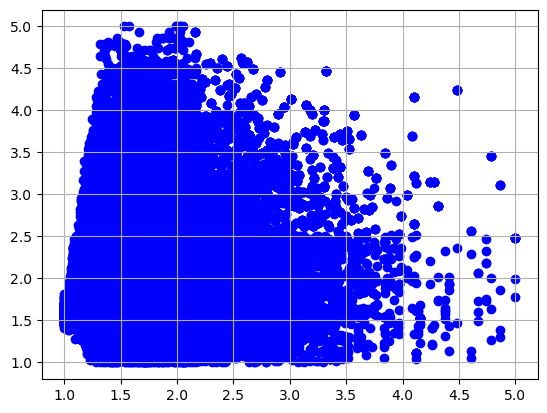

outlier indices:  [13751, 24739, 24740, 26903, 40239, 68004, 99512] Number of outliers:  7


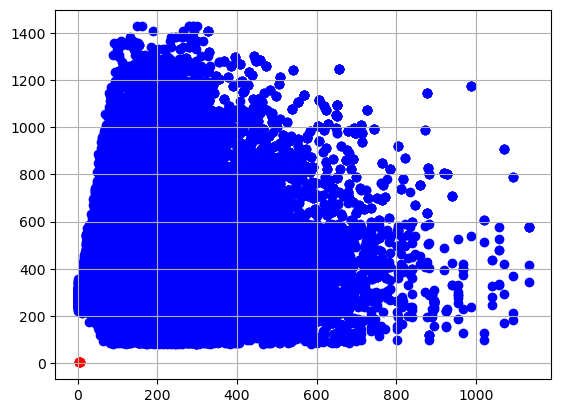

(100000, 45)
(99993, 45)


In [26]:
# plot data points
plt.scatter(df_Num['Amount_invested_monthly'], df_Num['Monthly_Balance'], color = "b")
plt.grid()
plt.show()

# model specification
model1 = LocalOutlierFactor(n_neighbors = 100 , metric = "euclidean")
# model fitting
y_pred = model1.fit_predict(df_Num)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers 
outlier_index = list(outlier_index[0])
print("outlier indices: ", outlier_index, 'Number of outliers: ', len(outlier_index))
# filter outlier values
outlier_values = df_Num.iloc[outlier_index]
# plot data
plt.scatter(df2['Amount_invested_monthly'], df2['Monthly_Balance'], color = "b")
# plot outlier values
plt.scatter(outlier_values['Amount_invested_monthly'], outlier_values['Monthly_Balance'], color = "r")
plt.grid()
plt.show()

print(df_Num.shape)
# remove outliers
df_Num = df_Num.drop(outlier_index, axis=0)
print(df_Num.shape)

##### Dropping The Outliers Identified From Above Method

In [27]:
# df1 backup dataframe
# df2 dataframe for numerical operations

df1 = df1.drop(outlier_index, axis=0)
df2 = df2.drop(outlier_index, axis=0)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

In [28]:
df2.describe(include='all')

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
count,99993.000000,99993.000000,99993,99993.000000,99993.000000,99993.000000,99993.000000,99993.000000,99993.000000,99993.000000,...,99993,99993.000000,99993.000000,99993,99993.000000,99993.000000,99993,99993.000000,99993,99993.000000
unique,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,3,NaN,NaN,6,NaN,3,NaN
top,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Standard,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard,NaN
freq,NaN,NaN,7094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45848,NaN,NaN,52326,NaN,NaN,27760,NaN,53171,NaN
mean,4.499925,33.312127,NaN,50496.638189,4197.635483,5.369051,5.533877,14.532587,3.532977,21.052559,...,NaN,1426.260062,32.269384,NaN,106.261311,158.302930,NaN,398.183106,NaN,221.101717
std,2.291271,10.764209,NaN,38287.250299,3186.377110,2.593269,2.066972,8.741385,2.446384,14.822238,...,NaN,1155.153185,5.089635,NaN,186.599779,120.505375,NaN,193.793928,NaN,99.665017
min,1.000000,14.000000,NaN,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,...,NaN,0.230000,20.000000,NaN,0.000000,0.000000,NaN,81.381619,NaN,1.000000
25%,2.000000,24.000000,NaN,19339.080000,1626.594167,3.000000,4.000000,7.000000,2.000000,10.000000,...,NaN,566.080000,28.052344,NaN,29.131335,73.634646,NaN,272.643042,NaN,144.000000
50%,4.000000,33.000000,NaN,36996.830000,3095.978333,5.000000,5.000000,13.000000,3.000000,18.000000,...,NaN,1166.230000,32.305524,NaN,66.312566,127.522974,NaN,339.318537,NaN,219.000000
75%,6.000000,42.000000,NaN,71681.400000,5961.637500,7.000000,7.000000,20.000000,5.000000,28.000000,...,NaN,1946.810000,36.486018,NaN,145.639552,210.324594,NaN,470.642999,NaN,302.000000


##### Taking Backup For Categorical Classifiers & Association Rules

In [29]:
df2_cat = df2.copy(deep=True)

### Data Integration - Correlation Analysis

##### Normalizing All Numerical Columns

In [30]:
numeric_columns = df2.select_dtypes(include=['number'])

df2_num = df2.copy()
scaler = MinMaxScaler(feature_range=(1, 5))
df2_num[numeric_columns.columns] = scaler.fit_transform(df2_num[numeric_columns.columns])

display(HTML(df2_num.head().to_html()))

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,1.000000,1.857143,Scientist,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.474074,2.000000,2.817439,1.941176,Good,1.64808,2.093009,No,1.009169,1.283985,High_spent_Small_value_payments,1.686601,Good,3.620347
1,1.571429,1.857143,Scientist,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.237037,1.928571,2.817439,1.941176,Good,1.64808,2.913627,No,1.009169,1.417704,Low_spent_Large_value_payments,1.603818,Good,3.620347
2,2.142857,1.857143,Scientist,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.474074,2.000000,2.817439,1.941176,Good,1.64808,2.379250,No,1.009169,1.288520,Low_spent_Medium_value_payments,1.742202,Good,3.640199
3,2.714286,1.857143,Scientist,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.592593,1.571429,2.234179,1.941176,Good,1.64808,2.822776,No,1.009169,1.704382,Low_spent_Small_value_payments,1.422068,Good,3.650124
4,3.285714,1.857143,Scientist,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.651852,1.928571,2.817439,1.941176,Good,1.64808,1.768553,No,1.009169,1.146274,High_spent_Medium_value_payments,1.772741,Good,3.660050


##### Identifying All Correlation Between Numerical Columns

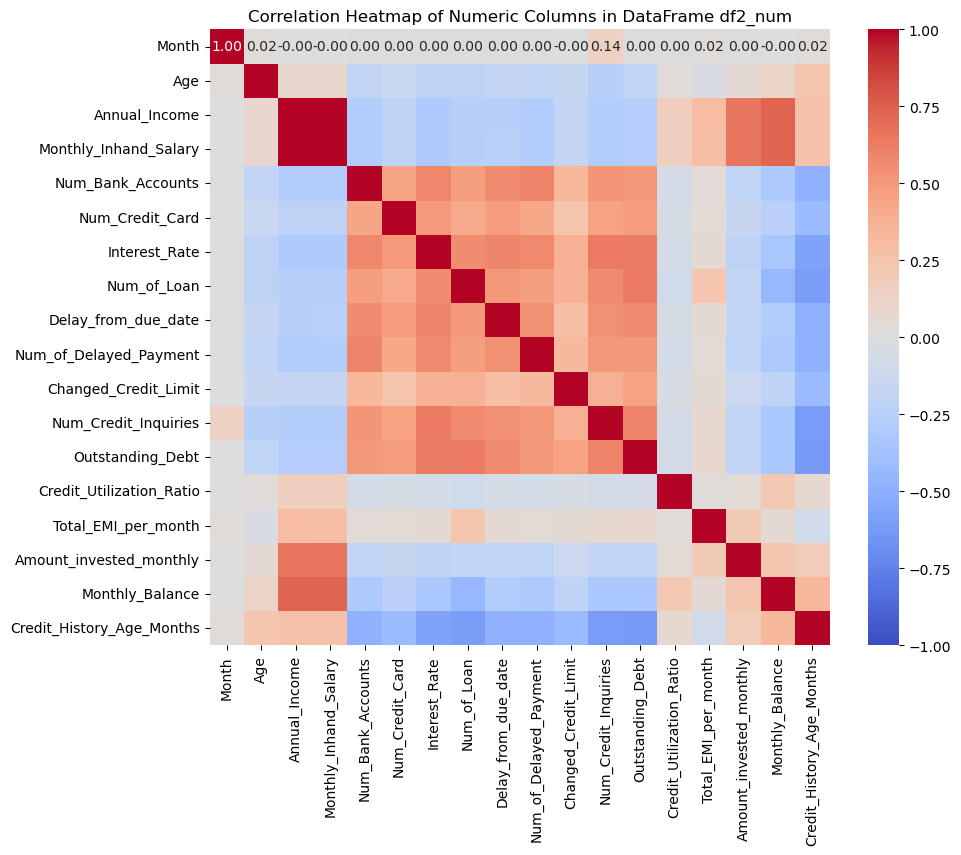

In [31]:
numeric_columns = df2_num.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns in DataFrame df2_num')
plt.show()

##### Displaying The Correlation Values

In [32]:
correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            correlation = (correlation_matrix.iloc[i, j], correlation_matrix.columns[i], correlation_matrix.columns[j])
            correlations.append(correlation)

correlations.sort(reverse=True)

# Display sorted correlations
for correlation_strength, col1, col2 in correlations:
    print(f"Correlation between '{col1}' and '{col2}': {correlation_strength}")

Correlation between 'Annual_Income' and 'Monthly_Inhand_Salary': 0.9981931786577981
Correlation between 'Monthly_Inhand_Salary' and 'Monthly_Balance': 0.7312678295065864
Correlation between 'Annual_Income' and 'Monthly_Balance': 0.7299898792469446
Correlation between 'Monthly_Inhand_Salary' and 'Amount_invested_monthly': 0.6627806893284941
Correlation between 'Annual_Income' and 'Amount_invested_monthly': 0.6617174995194506
Correlation between 'Num_of_Loan' and 'Outstanding_Debt': 0.6387264878651886
Correlation between 'Interest_Rate' and 'Num_Credit_Inquiries': 0.6341868930751874
Correlation between 'Interest_Rate' and 'Outstanding_Debt': 0.6294166952679965
Correlation between 'Num_Bank_Accounts' and 'Num_of_Delayed_Payment': 0.6013421266600413
Correlation between 'Num_Credit_Inquiries' and 'Outstanding_Debt': 0.5983118618738731
Correlation between 'Interest_Rate' and 'Delay_from_due_date': 0.5892042766251065
Correlation between 'Num_Bank_Accounts' and 'Interest_Rate': 0.5842815116198

##### We can remove strongly correlated columns such as 'Annual_Income' and 'Monthly_Inhand_Salary'

##### Identifying All Correlation Between Categorical Columns By Chi-Sqaure Test

In [33]:
categorical_columns = df2.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame for the correlation matrix
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate the correlation for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        contingency_table = pd.crosstab(df2[col1], df2[col2])
        chi, p, dof, expects = chi2_contingency(contingency_table)
        coef = association(contingency_table)
        correlation_matrix.loc[col1, col2] = f"chi={chi:.2f}, p-value={p:.2f}, coefficient={coef:.2f}"

# Print the correlation matrix
correlation_matrix

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
Occupation,"chi=1399902.00, p-value=0.00, coefficient=1.00","chi=223.87, p-value=0.00, coefficient=0.03","chi=87.16, p-value=0.00, coefficient=0.02","chi=96.33, p-value=0.02, coefficient=0.01","chi=180.46, p-value=0.00, coefficient=0.03"
Credit_Mix,"chi=223.87, p-value=0.00, coefficient=0.03","chi=199986.00, p-value=0.00, coefficient=1.00","chi=59080.33, p-value=0.00, coefficient=0.54","chi=1678.37, p-value=0.00, coefficient=0.09","chi=40488.40, p-value=0.00, coefficient=0.45"
Payment_of_Min_Amount,"chi=87.16, p-value=0.00, coefficient=0.02","chi=59080.33, p-value=0.00, coefficient=0.54","chi=199986.00, p-value=0.00, coefficient=1.00","chi=1178.03, p-value=0.00, coefficient=0.08","chi=19618.62, p-value=0.00, coefficient=0.31"
Payment_Behaviour,"chi=96.33, p-value=0.02, coefficient=0.01","chi=1678.37, p-value=0.00, coefficient=0.09","chi=1178.03, p-value=0.00, coefficient=0.08","chi=499965.00, p-value=0.00, coefficient=1.00","chi=1531.34, p-value=0.00, coefficient=0.09"
Credit_Score,"chi=180.46, p-value=0.00, coefficient=0.03","chi=40488.40, p-value=0.00, coefficient=0.45","chi=19618.62, p-value=0.00, coefficient=0.31","chi=1531.34, p-value=0.00, coefficient=0.09","chi=199986.00, p-value=0.00, coefficient=1.00"


##### We can see that Credit_Mix and Credit_Score, Credit_Mix and Payment_of_Min_Amount are highly correlated.

##### Converting Nominal Columns To N-1 Binary Columns

In [34]:
cols= ['Payment_Behaviour', 'Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']

for col in cols:
    df2_dummies = pd.get_dummies(df2[[col]], dtype=int)
    df2 = df2.join(df2_dummies)

df2 = df2.drop(cols, axis=1)
df2 = df2.drop(['Occupation_Doctor', 'Payment_of_Min_Amount_NM', 'Payment_Behaviour_High_spent_Large_value_payments', 'Credit_Mix_Bad'], axis=1)


display(HTML(df2.head().to_html()))

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,Good,265.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,6.5,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,Good,265.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,Good,267.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Good,268.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.5,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Good,269.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


##### Identifying The Target Data Split

In [35]:
df2.groupby(['Credit_Score']).size()

Credit_Score
Good        17825
Poor        28997
Standard    53171
dtype: int64

##### Encoding The Target Variabe

In [36]:
y = df2['Credit_Score']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

print(y_encoded)

df2['Credit_Score'] = y_encoded
display(HTML(df2.head().to_html()))

[0 0 0 ... 1 2 1]


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,0,265.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,6.5,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,0,265.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,0,267.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,0,268.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.5,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,0,269.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


##### Normalizing Whole Dataset

In [37]:
df2_std = df2.copy(deep=True)
print(df2_std.columns)

cols = df2_std.columns.drop('Credit_Score')

scaler = MinMaxScaler(feature_range=(1,5))

df2_std[cols] = scaler.fit_transform(df2_std[cols])
display(HTML(df2_std.head().to_html()))

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Age_Months',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,1.000000,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.474074,2.000000,2.817439,1.941176,1.64808,2.093009,1.009169,1.283985,1.686601,0,3.620347,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0
1,1.571429,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.237037,1.928571,2.817439,1.941176,1.64808,2.913627,1.009169,1.417704,1.603818,0,3.620347,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0
2,2.142857,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.474074,2.000000,2.817439,1.941176,1.64808,2.379250,1.009169,1.288520,1.742202,0,3.640199,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0
3,2.714286,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.592593,1.571429,2.234179,1.941176,1.64808,2.822776,1.009169,1.704382,1.422068,0,3.650124,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0
4,3.285714,1.857143,1.279988,1.408348,2.090909,2.454545,1.242424,2.777778,1.651852,1.928571,2.817439,1.941176,1.64808,1.768553,1.009169,1.146274,1.772741,0,3.660050,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0


#### Performing Over Sampling To Handle Imbalanced Data

In [38]:
y = df2_std['Credit_Score']
x = df2_std.drop('Credit_Score', axis=1)

kf = KFold(n_splits=5, shuffle=True)
data_5folds = []
for train_index, test_index in kf.split(x,y):
    print("\nTRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    fold = [x_train, x_test, y_train, y_test]
    data_5folds.append(fold)

for k in range(5, 6, 2): 
    acc_5folds = []
    for x_train, x_test, y_train, y_test in data_5folds:
        print('\nOriginal dataset shape {}'.format(Counter(y_train)))
        ros = RandomOverSampler(random_state=100)
        ros.fit(x_train, y_train)
        x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
        print('After oversampling dataset shape {}'.format(Counter(y_resampled)))
        clf=neighbors.KNeighborsClassifier(k, weights='uniform')
        clf.fit(x_resampled, y_resampled)
        y_pred = clf.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        acc_5folds.append(acc)
    print('k = ',k,'Accuracy on 5-folds: ', np.mean(acc_5folds))


TRAIN: [    1     2     4 ... 99990 99991 99992] TEST: [    0     3    20 ... 99977 99980 99988]

TRAIN: [    0     1     3 ... 99988 99990 99992] TEST: [    2    16    18 ... 99981 99989 99991]

TRAIN: [    0     2     3 ... 99989 99990 99991] TEST: [    1     4     7 ... 99982 99985 99992]

TRAIN: [    0     1     2 ... 99990 99991 99992] TEST: [    6    11    14 ... 99969 99983 99984]

TRAIN: [    0     1     2 ... 99989 99991 99992] TEST: [    5     8     9 ... 99986 99987 99990]

Original dataset shape Counter({2: 42499, 1: 23211, 0: 14284})
After oversampling dataset shape Counter({0: 42499, 2: 42499, 1: 42499})

Original dataset shape Counter({2: 42579, 1: 23196, 0: 14219})
After oversampling dataset shape Counter({0: 42579, 2: 42579, 1: 42579})

Original dataset shape Counter({2: 42518, 1: 23234, 0: 14242})
After oversampling dataset shape Counter({0: 42518, 2: 42518, 1: 42518})

Original dataset shape Counter({2: 42513, 1: 23190, 0: 14292})
After oversampling dataset shape Co

#### Data Reduction - Feature Selection Method

##### Performing Feature Selection Using Entropy Criteria

In [39]:
y = y_resampled
x = x_resampled

model = ExtraTreesClassifier(n_estimators = 200, criterion='entropy', max_depth = 20, min_samples_split = 50, min_samples_leaf = 25, 
                             max_leaf_nodes = 100,  min_impurity_decrease=0.0, class_weight = 'balanced', random_state = 100)
model.fit(x, y)

values = model.feature_importances_.tolist()
keys = x.columns.tolist()
d = dict(zip(keys, values))

s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

print('\nRanked features by Entropy importance:\n')
for k, v in s:
    if v >= 0.01:
        print(k,'\t',v)


Ranked features by Entropy importance:

Credit_Mix_Good 	 0.20931898453156295
Credit_Mix_Standard 	 0.11813494166482083
Interest_Rate 	 0.10237850196110135
Payment_of_Min_Amount_No 	 0.10047185119010844
Payment_of_Min_Amount_Yes 	 0.09417305400373216
Outstanding_Debt 	 0.08061401434570725
Num_Credit_Inquiries 	 0.04972430222888577
Credit_History_Age_Months 	 0.03619524616035159
Delay_from_due_date 	 0.03507130593280954
Num_Credit_Card 	 0.03472605598668853
Num_Bank_Accounts 	 0.02997036670344359
Month 	 0.023467007974983207
Num_of_Loan 	 0.021742006934037085
Num_of_Delayed_Payment 	 0.02105522708442753
Changed_Credit_Limit 	 0.010390081692301814


##### Selecting Top 10 Features From Entropy Criteria

In [40]:
x_resampled_ent = x_resampled[['Credit_Mix_Good', 'Credit_Mix_Standard', 'Interest_Rate', 'Payment_of_Min_Amount_Yes', 
                                'Payment_of_Min_Amount_No', 'Outstanding_Debt', 'Num_Credit_Inquiries', 'Delay_from_due_date', 
                                'Credit_History_Age_Months', 'Num_Credit_Card']]

display(HTML(x_resampled_ent.head().to_html()))

,Credit_Mix_Good,Credit_Mix_Standard,Interest_Rate,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age_Months,Num_Credit_Card
0,5.0,1.0,1.242424,1.0,5.0,1.64808,1.941176,1.474074,3.620347,2.454545
1,5.0,1.0,1.242424,1.0,5.0,1.64808,1.941176,1.237037,3.620347,2.454545
2,5.0,1.0,1.242424,1.0,5.0,1.64808,1.941176,1.474074,3.640199,2.454545
3,5.0,1.0,1.242424,1.0,5.0,1.64808,1.941176,1.592593,3.650124,2.454545
4,5.0,1.0,1.242424,1.0,5.0,1.64808,1.941176,1.651852,3.660050,2.454545


##### Converting Numerical Data To Categorical

In [41]:
display(HTML(df2_cat.head().to_html()))

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,1.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,2.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,6.5,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265.0
2,3.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,4.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,5.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.5,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0


In [42]:
num_cols = df2_cat.select_dtypes(include=['number']).columns

# Iterate over numerical columns
for col in num_cols:
    # Calculate quartiles
    q25, q50, q75 = df2_cat[col].quantile([0.25, 0.50, 0.75])    
    range_labels = [f"{q25} to {q50}", f"{q50} to {q75}", f"{q75} to {df2_cat[col].max()}"]
    df2_cat[col + '_range'] = pd.cut(df2_cat[col], bins=[df2_cat[col].min(), q25, q75, df2_cat[col].max()], labels=range_labels)
    
    # Iterate over range labels and convert to binary
    for label in range_labels:
        df2_cat[col + f" [{label}]"] = (df2_cat[col + '_range'] == label).astype(int)

# Drop the original numerical columns and quartile range columns
df2_cat.drop(columns=num_cols, inplace=True)
df2_cat.drop(columns=[col + '_range' for col in num_cols], inplace=True)

display(HTML(df2_cat.head().to_html()))

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Month [2.0 to 4.0],Month [4.0 to 6.0],Month [6.0 to 8.0],Age [24.0 to 33.0],Age [33.0 to 42.0],Age [42.0 to 56.0],Annual_Income [19339.08 to 36996.83],Annual_Income [36996.83 to 71681.4],Annual_Income [71681.4 to 179987.28],Monthly_Inhand_Salary [1626.594166666667 to 3095.978333333333],Monthly_Inhand_Salary [3095.978333333333 to 5961.6375],Monthly_Inhand_Salary [5961.6375 to 15204.633333333331],Num_Bank_Accounts [3.0 to 5.0],Num_Bank_Accounts [5.0 to 7.0],Num_Bank_Accounts [7.0 to 11.0],Num_Credit_Card [4.0 to 5.0],Num_Credit_Card [5.0 to 7.0],Num_Credit_Card [7.0 to 11.0],Interest_Rate [7.0 to 13.0],Interest_Rate [13.0 to 20.0],Interest_Rate [20.0 to 34.0],Num_of_Loan [2.0 to 3.0],Num_of_Loan [3.0 to 5.0],Num_of_Loan [5.0 to 9.0],Delay_from_due_date [10.0 to 18.0],Delay_from_due_date [18.0 to 28.0],Delay_from_due_date [28.0 to 62.5],Num_of_Delayed_Payment [9.0 to 14.0],Num_of_Delayed_Payment [14.0 to 18.0],Num_of_Delayed_Payment [18.0 to 28.0],Changed_Credit_Limit [5.34 to 9.4],Changed_Credit_Limit [9.4 to 14.85],Changed_Credit_Limit [14.85 to 29.98],Num_Credit_Inquiries [3.0 to 5.0],Num_Credit_Inquiries [5.0 to 8.0],Num_Credit_Inquiries [8.0 to 17.0],Outstanding_Debt [566.08 to 1166.23],Outstanding_Debt [1166.23 to 1946.81],Outstanding_Debt [1946.81 to 4998.07],Credit_Utilization_Ratio [28.05234445125113 to 32.30552378486248],Credit_Utilization_Ratio [32.30552378486248 to 36.486018233613954],Credit_Utilization_Ratio [36.486018233613954 to 44.96820522820443],Total_EMI_per_month [29.13133496222223 to 66.31256648622086],Total_EMI_per_month [66.31256648622086 to 145.6395523263464],Total_EMI_per_month [145.6395523263464 to 21627.11710415826],Amount_invested_monthly [73.63464644580425 to 127.5229742043934],Amount_invested_monthly [127.5229742043934 to 210.32459402415014],Amount_invested_monthly [210.32459402415014 to 1132.6696341760935],Monthly_Balance [272.6430415618064 to 339.31853676978216],Monthly_Balance [339.31853676978216 to 470.6429990645397],Monthly_Balance [470.6429990645397 to 1427.7974642624645],Credit_History_Age_Months [144.0 to 219.0],Credit_History_Age_Months [219.0 to 302.0],Credit_History_Age_Months [302.0 to 404.0]
0,Scientist,Good,No,High_spent_Small_value_payments,Good,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0


##### Converting Nominal Columns To N-1 Binary Columns

In [43]:
df2_NB = df2_cat.copy(deep=True)

cols= ['Payment_Behaviour', 'Occupation', 'Payment_of_Min_Amount', 'Credit_Mix']

for col in cols:
    df2_NB_dummies = pd.get_dummies(df2_NB[[col]], dtype=int)
    df2_NB = df2_NB.join(df2_NB_dummies)

df2_NB = df2_NB.drop(cols, axis=1)
df2_NB = df2_NB.drop(['Occupation_Doctor', 'Payment_of_Min_Amount_NM', 'Payment_Behaviour_High_spent_Large_value_payments', 'Credit_Mix_Bad'], axis=1)

display(HTML(df2_NB.head().to_html()))

,Credit_Score,Month [2.0 to 4.0],Month [4.0 to 6.0],Month [6.0 to 8.0],Age [24.0 to 33.0],Age [33.0 to 42.0],Age [42.0 to 56.0],Annual_Income [19339.08 to 36996.83],Annual_Income [36996.83 to 71681.4],Annual_Income [71681.4 to 179987.28],Monthly_Inhand_Salary [1626.594166666667 to 3095.978333333333],Monthly_Inhand_Salary [3095.978333333333 to 5961.6375],Monthly_Inhand_Salary [5961.6375 to 15204.633333333331],Num_Bank_Accounts [3.0 to 5.0],Num_Bank_Accounts [5.0 to 7.0],Num_Bank_Accounts [7.0 to 11.0],Num_Credit_Card [4.0 to 5.0],Num_Credit_Card [5.0 to 7.0],Num_Credit_Card [7.0 to 11.0],Interest_Rate [7.0 to 13.0],Interest_Rate [13.0 to 20.0],Interest_Rate [20.0 to 34.0],Num_of_Loan [2.0 to 3.0],Num_of_Loan [3.0 to 5.0],Num_of_Loan [5.0 to 9.0],Delay_from_due_date [10.0 to 18.0],Delay_from_due_date [18.0 to 28.0],Delay_from_due_date [28.0 to 62.5],Num_of_Delayed_Payment [9.0 to 14.0],Num_of_Delayed_Payment [14.0 to 18.0],Num_of_Delayed_Payment [18.0 to 28.0],Changed_Credit_Limit [5.34 to 9.4],Changed_Credit_Limit [9.4 to 14.85],Changed_Credit_Limit [14.85 to 29.98],Num_Credit_Inquiries [3.0 to 5.0],Num_Credit_Inquiries [5.0 to 8.0],Num_Credit_Inquiries [8.0 to 17.0],Outstanding_Debt [566.08 to 1166.23],Outstanding_Debt [1166.23 to 1946.81],Outstanding_Debt [1946.81 to 4998.07],Credit_Utilization_Ratio [28.05234445125113 to 32.30552378486248],Credit_Utilization_Ratio [32.30552378486248 to 36.486018233613954],Credit_Utilization_Ratio [36.486018233613954 to 44.96820522820443],Total_EMI_per_month [29.13133496222223 to 66.31256648622086],Total_EMI_per_month [66.31256648622086 to 145.6395523263464],Total_EMI_per_month [145.6395523263464 to 21627.11710415826],Amount_invested_monthly [73.63464644580425 to 127.5229742043934],Amount_invested_monthly [127.5229742043934 to 210.32459402415014],Amount_invested_monthly [210.32459402415014 to 1132.6696341760935],Monthly_Balance [272.6430415618064 to 339.31853676978216],Monthly_Balance [339.31853676978216 to 470.6429990645397],Monthly_Balance [470.6429990645397 to 1427.7974642624645],Credit_History_Age_Months [144.0 to 219.0],Credit_History_Age_Months [219.0 to 302.0],Credit_History_Age_Months [302.0 to 404.0],Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,Good,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,Good,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


##### Encoding The Target Variabe

In [44]:
y = df2_NB['Credit_Score']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

print(y_encoded)

df2_NB['Credit_Score'] = y_encoded
display(HTML(df2_NB.head().to_html()))

[0 0 0 ... 1 2 1]


,Credit_Score,Month [2.0 to 4.0],Month [4.0 to 6.0],Month [6.0 to 8.0],Age [24.0 to 33.0],Age [33.0 to 42.0],Age [42.0 to 56.0],Annual_Income [19339.08 to 36996.83],Annual_Income [36996.83 to 71681.4],Annual_Income [71681.4 to 179987.28],Monthly_Inhand_Salary [1626.594166666667 to 3095.978333333333],Monthly_Inhand_Salary [3095.978333333333 to 5961.6375],Monthly_Inhand_Salary [5961.6375 to 15204.633333333331],Num_Bank_Accounts [3.0 to 5.0],Num_Bank_Accounts [5.0 to 7.0],Num_Bank_Accounts [7.0 to 11.0],Num_Credit_Card [4.0 to 5.0],Num_Credit_Card [5.0 to 7.0],Num_Credit_Card [7.0 to 11.0],Interest_Rate [7.0 to 13.0],Interest_Rate [13.0 to 20.0],Interest_Rate [20.0 to 34.0],Num_of_Loan [2.0 to 3.0],Num_of_Loan [3.0 to 5.0],Num_of_Loan [5.0 to 9.0],Delay_from_due_date [10.0 to 18.0],Delay_from_due_date [18.0 to 28.0],Delay_from_due_date [28.0 to 62.5],Num_of_Delayed_Payment [9.0 to 14.0],Num_of_Delayed_Payment [14.0 to 18.0],Num_of_Delayed_Payment [18.0 to 28.0],Changed_Credit_Limit [5.34 to 9.4],Changed_Credit_Limit [9.4 to 14.85],Changed_Credit_Limit [14.85 to 29.98],Num_Credit_Inquiries [3.0 to 5.0],Num_Credit_Inquiries [5.0 to 8.0],Num_Credit_Inquiries [8.0 to 17.0],Outstanding_Debt [566.08 to 1166.23],Outstanding_Debt [1166.23 to 1946.81],Outstanding_Debt [1946.81 to 4998.07],Credit_Utilization_Ratio [28.05234445125113 to 32.30552378486248],Credit_Utilization_Ratio [32.30552378486248 to 36.486018233613954],Credit_Utilization_Ratio [36.486018233613954 to 44.96820522820443],Total_EMI_per_month [29.13133496222223 to 66.31256648622086],Total_EMI_per_month [66.31256648622086 to 145.6395523263464],Total_EMI_per_month [145.6395523263464 to 21627.11710415826],Amount_invested_monthly [73.63464644580425 to 127.5229742043934],Amount_invested_monthly [127.5229742043934 to 210.32459402415014],Amount_invested_monthly [210.32459402415014 to 1132.6696341760935],Monthly_Balance [272.6430415618064 to 339.31853676978216],Monthly_Balance [339.31853676978216 to 470.6429990645397],Monthly_Balance [470.6429990645397 to 1427.7974642624645],Credit_History_Age_Months [144.0 to 219.0],Credit_History_Age_Months [219.0 to 302.0],Credit_History_Age_Months [302.0 to 404.0],Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


#### Performing Over Sampling To Handle Imbalanced Data

In [45]:
y = df2_NB['Credit_Score']
x = df2_NB.drop('Credit_Score', axis=1)

kf = KFold(n_splits=5, shuffle=True)
data_5folds = []
for train_index, test_index in kf.split(x,y):
    print("\nTRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    fold = [x_train, x_test, y_train, y_test]
    data_5folds.append(fold)

for k in range(5, 6, 2): 
    acc_5folds = []
    for x_train, x_test, y_train, y_test in data_5folds:
        print('\nOriginal dataset shape {}'.format(Counter(y_train)))
        ros = RandomOverSampler(random_state=100)
        ros.fit(x_train, y_train)
        x_resampled_Cat, y_resampled_Cat = ros.fit_resample(x_train, y_train)
        print('After oversampling dataset shape {}'.format(Counter(y_resampled_Cat)))
        clf=neighbors.KNeighborsClassifier(k, weights='uniform')
        clf.fit(x_resampled_Cat, y_resampled_Cat)
        y_pred = clf.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        acc_5folds.append(acc)
    print('k = ',k,'Accuracy on 5-folds: ', np.mean(acc_5folds))


TRAIN: [    0     1     3 ... 99990 99991 99992] TEST: [    2     5    11 ... 99979 99986 99989]

TRAIN: [    0     1     2 ... 99989 99990 99991] TEST: [    8    12    14 ... 99982 99987 99992]

TRAIN: [    1     2     3 ... 99989 99990 99992] TEST: [    0     7    18 ... 99981 99983 99991]

TRAIN: [    0     1     2 ... 99990 99991 99992] TEST: [    3    17    26 ... 99967 99972 99985]

TRAIN: [    0     2     3 ... 99989 99991 99992] TEST: [    1     4     6 ... 99984 99988 99990]

Original dataset shape Counter({2: 42585, 1: 23155, 0: 14254})
After oversampling dataset shape Counter({0: 42585, 2: 42585, 1: 42585})

Original dataset shape Counter({2: 42548, 1: 23217, 0: 14229})
After oversampling dataset shape Counter({0: 42548, 2: 42548, 1: 42548})

Original dataset shape Counter({2: 42457, 1: 23198, 0: 14339})
After oversampling dataset shape Counter({0: 42457, 2: 42457, 1: 42457})

Original dataset shape Counter({2: 42498, 1: 23170, 0: 14327})
After oversampling dataset shape Co

##### Performing Feature Selection Using Entropy Criteria

In [46]:
y = y_resampled_Cat
x = x_resampled_Cat

model = ExtraTreesClassifier(n_estimators = 200, criterion='entropy', max_depth = 20, min_samples_split = 50, min_samples_leaf = 25, 
                             max_leaf_nodes = 100,  min_impurity_decrease=0.0, class_weight = 'balanced', random_state = 100)
model.fit(x, y)

values = model.feature_importances_.tolist()
keys = x.columns.tolist()
d = dict(zip(keys, values))

s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

print('\nRanked features by entropy criteria:\n')
for k, v in s:
    if v >= 0.01:
        print(k,'\t',v)


Ranked features by entropy criteria:

Credit_Mix_Good 	 0.174452437666945
Interest_Rate [20.0 to 34.0] 	 0.10403484215068452
Credit_Mix_Standard 	 0.08956292839504694
Payment_of_Min_Amount_No 	 0.08454625131638134
Payment_of_Min_Amount_Yes 	 0.07558332706983907
Outstanding_Debt [1946.81 to 4998.07] 	 0.06399738170874654
Num_Credit_Inquiries [8.0 to 17.0] 	 0.05221680059495097
Delay_from_due_date [28.0 to 62.5] 	 0.0362814978324128
Num_Credit_Card [7.0 to 11.0] 	 0.025566968062275028
Credit_History_Age_Months [144.0 to 219.0] 	 0.025097813852433964
Num_of_Loan [5.0 to 9.0] 	 0.02368156575481808
Num_Credit_Card [4.0 to 5.0] 	 0.023231198914090496
Outstanding_Debt [566.08 to 1166.23] 	 0.020709042838509766
Delay_from_due_date [10.0 to 18.0] 	 0.020374979763811377
Credit_History_Age_Months [302.0 to 404.0] 	 0.017753031402944146
Interest_Rate [7.0 to 13.0] 	 0.015205821095652971
Interest_Rate [13.0 to 20.0] 	 0.015123231978950612
Changed_Credit_Limit [14.85 to 29.98] 	 0.01247263925694744

##### Selecting Top 10 Features From Entropy Criteria

In [47]:
x_resampled_ent_Cat = x_resampled_Cat[['Credit_Mix_Good', 'Credit_Mix_Standard', 'Interest_Rate [20.0 to 34.0]', 'Payment_of_Min_Amount_Yes', 
                                'Payment_of_Min_Amount_No', 'Outstanding_Debt [1946.81 to 4998.07]', 'Num_Credit_Inquiries [8.0 to 17.0]', 
                                'Delay_from_due_date [28.0 to 62.5]', 'Credit_History_Age_Months [144.0 to 219.0]', 'Num_Credit_Card [7.0 to 11.0]']]

display(HTML(x_resampled_ent_Cat.head().to_html()))

,Credit_Mix_Good,Credit_Mix_Standard,Interest_Rate [20.0 to 34.0],Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Outstanding_Debt [1946.81 to 4998.07],Num_Credit_Inquiries [8.0 to 17.0],Delay_from_due_date [28.0 to 62.5],Credit_History_Age_Months [144.0 to 219.0],Num_Credit_Card [7.0 to 11.0]
0,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0


### Classification

#### 1) KNN Classifier

In [48]:
y = y_resampled
x = x_resampled_ent

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

k_values = [11, 111, 711, 1121, 1151]

for k in k_values:
    KNN_Model_1 = KNeighborsClassifier(k, metric='manhattan', weights='distance', algorithm='brute', leaf_size=30, p=1)
    KNN_Model_1_Acc = cross_validate(KNN_Model_1, x, y, cv = 5, scoring = Metrics)

    for metric in Metrics:
        metric_scores = KNN_Model_1_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'K={k}, {metric}: {mean_score:.4f}', end=' ')
    print()

K=11, Accuracy: 0.7937 K=11, Precision_micro: 0.7937 K=11, F1_micro: 0.7937 K=11, Recall_micro: 0.7937 K=11, AUC_micro: 0.9240 
K=111, Accuracy: 0.8232 K=111, Precision_micro: 0.8232 K=111, F1_micro: 0.8232 K=111, Recall_micro: 0.8232 K=111, AUC_micro: 0.9496 
K=711, Accuracy: 0.8318 K=711, Precision_micro: 0.8318 K=711, F1_micro: 0.8318 K=711, Recall_micro: 0.8318 K=711, AUC_micro: 0.9557 
K=1121, Accuracy: 0.8329 K=1121, Precision_micro: 0.8329 K=1121, F1_micro: 0.8329 K=1121, Recall_micro: 0.8329 K=1121, AUC_micro: 0.9566 
K=1151, Accuracy: 0.8330 K=1151, Precision_micro: 0.8330 K=1151, F1_micro: 0.8330 K=1151, Recall_micro: 0.8330 K=1151, AUC_micro: 0.9566 


#### KNN Classifier With Best K Value

In [49]:
y = y_resampled
x = x_resampled_ent

k_values = [1121]

KNN_Model_2 = KNeighborsClassifier(k, metric='manhattan', weights='distance', algorithm='brute', leaf_size=30, p=1)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

KNN_Model_2_Acc = cross_validate(KNN_Model_2, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = KNN_Model_2_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.8335 Precision_micro: 0.8335 F1_micro: 0.8335 Recall_micro: 0.8335 AUC_micro: 0.9567 

#### Naive Bayesian Classifier

#### 2) Categorical NB Classifier

In [50]:
y = y_resampled_Cat
x = x_resampled_ent_Cat

NB_Model_1 = CategoricalNB(alpha=2.0, class_prior = None, fit_prior = True, force_alpha = True, min_categories = 10)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

NB_Model_1_Acc = cross_validate(NB_Model_1, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = NB_Model_1_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7019 Precision_micro: 0.7019 F1_micro: 0.7019 Recall_micro: 0.7019 AUC_micro: 0.8021 

#### 3) Gaussian NB Classifier

In [51]:
y = y_resampled
x = x_resampled_ent

NB_Model_2 = GaussianNB(var_smoothing = 1e-05)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

NB_Model_2_Acc = cross_validate(NB_Model_2, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = NB_Model_2_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7022 Precision_micro: 0.7022 F1_micro: 0.7022 Recall_micro: 0.7022 AUC_micro: 0.8113 

#### 4) Gaussian NB Classifier Ensembled With Bagging

In [52]:
y = y_resampled
x = x_resampled_ent

NB_Model_2 = GaussianNB(var_smoothing = 1e-05)

NB_Model_2_Bag = BaggingClassifier(NB_Model_2, n_estimators=100, max_samples=0.8, random_state=100)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

NB_Model_2_Bag_Acc = cross_validate(NB_Model_2_Bag, x, y, cv = 5, scoring = Metrics)

for metric in Metrics:
        metric_scores = NB_Model_2_Bag_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7020 Precision_micro: 0.7020 F1_micro: 0.7020 Recall_micro: 0.7020 AUC_micro: 0.8113 

#### 5) Decision Tree Classifier

In [53]:
y = y_resampled
x = x_resampled_ent

DT_Model_1 = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=5, max_leaf_nodes = 100, ccp_alpha = 0.0001, 
                            min_samples_split=1000, min_impurity_decrease=0.01, min_samples_leaf= 200, random_state = 100)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

DT_Model_1_Acc = cross_validate(DT_Model_1, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = DT_Model_1_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7097 Precision_micro: 0.7097 F1_micro: 0.7097 Recall_micro: 0.7097 AUC_micro: 0.8421 

##### Visualizing The Tree From The Above Decision Tree Classifier

[0.83435198 0.83022537 0.82201574 0.82429065 0.83819867 0.82571505
 0.83449623 0.81757881 0.82291504 0.82679622]
features:  ['Credit_Mix_Good', 'Credit_Mix_Standard', 'Interest_Rate', 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Outstanding_Debt', 'Num_Credit_Inquiries', 'Delay_from_due_date', 'Credit_History_Age_Months', 'Num_Credit_Card']
labels:  ['Good' 'Poor' 'Standard']


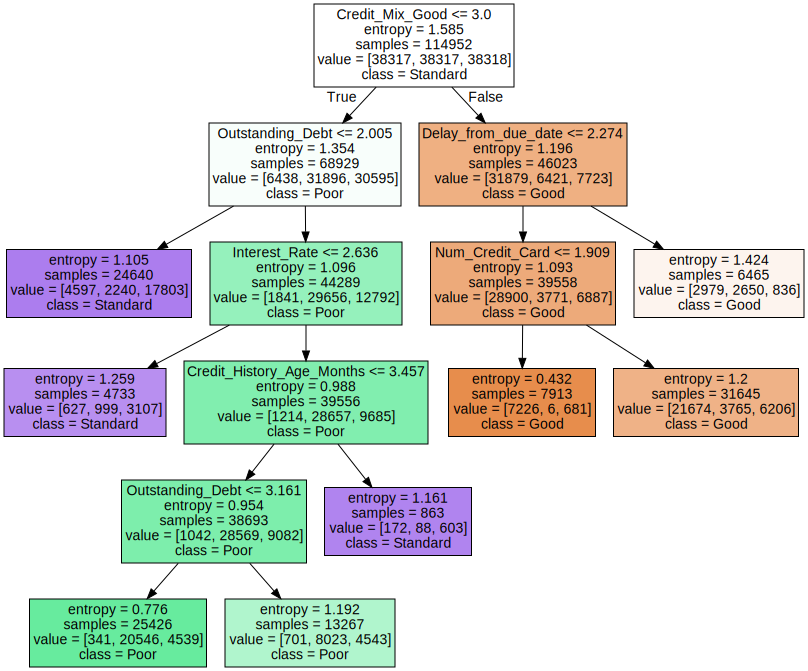

In [54]:
y = y_resampled
x = x_resampled_ent

DT_Model_1 = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=5, max_leaf_nodes = 100, ccp_alpha = 0.0001, 
                            min_samples_split=1000, min_impurity_decrease=0.01, min_samples_leaf= 200, random_state = 100)

rst = cross_validate(DT_Model_1, x, y, cv=10, scoring='roc_auc_ovr', return_estimator=True)

# get fitted trees for each fold
trees = rst['estimator']
# print accuracy scores for each fold
scores = rst['test_score']
print(scores)

# select the best model
best_fold_index = np.argmax(scores)
best_clf = trees[best_fold_index]

# encode labels
labels = le.inverse_transform([0,1,2])

print('features: ', x.columns.to_list())
print('labels: ', labels)

# DOT data
dot_data = tree.export_graphviz(best_clf, out_file=None, feature_names=x.columns.to_list(), class_names=labels, filled=True)

# Draw graph
graph_best= graphviz.Source(dot_data, format="png") 
# save graph to MyDecisionTree.png
graph_best.render("MyDecisionTree")
graph_best

#### 6) Decision Tree Classifier Ensembled with RandomForest

In [55]:
y = y_resampled
x = x_resampled_ent

DT_Model_1 = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=5, max_leaf_nodes = 100, ccp_alpha = 0.0001, 
                            min_samples_split=1000, min_impurity_decrease=0.01, min_samples_leaf= 200, random_state = 100)

DT_Model_1_Bag = BaggingClassifier(base_estimator= DT_Model_1, n_estimators=100, max_samples=0.8, random_state=100)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

DT_Model_1_Bag_Acc = cross_validate(DT_Model_1_Bag, x, y, cv = 5, scoring = Metrics)

for metric in Metrics:
        metric_scores = DT_Model_1_Bag_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7093 Precision_micro: 0.7093 F1_micro: 0.7093 Recall_micro: 0.7093 AUC_micro: 0.8473 

#### 7) Decision Tree Classifier Ensembled With GradientBoosting

In [56]:
y = y_resampled
x = x_resampled_ent

DT_Model_1_GB = GradientBoostingClassifier(n_estimators=100, random_state= 100, learning_rate=0.2, criterion='squared_error')

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

DT_Model_1_GB_Acc = cross_validate(DT_Model_1_GB, x, y, cv = 5, scoring = Metrics)

for metric in Metrics:
        metric_scores = DT_Model_1_GB_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7226 Precision_micro: 0.7226 F1_micro: 0.7226 Recall_micro: 0.7226 AUC_micro: 0.8666 

#### 8) Logistic Regression Classifier

In [57]:
y = y_resampled
x = x_resampled_ent

LR_Model_1 = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=200, multi_class='ovr', C= 10, tol = 1e-3,  
                         random_state= 100, dual=False, fit_intercept= True, intercept_scaling=1, class_weight='balanced')

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

LR_Model_1_Acc = cross_validate(LR_Model_1, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = LR_Model_1_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7038 Precision_micro: 0.7038 F1_micro: 0.7038 Recall_micro: 0.7038 AUC_micro: 0.8268 

#### 9) Logistic Regression Classifier Ensembled With Bagging

In [58]:
y = y_resampled
x = x_resampled_ent

LR_Model_1 = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=200, multi_class='ovr', C= 10, tol = 1e-3,  
                         random_state= 100, dual=False, fit_intercept= True, intercept_scaling=1, class_weight='balanced')

LR_Model_1_Bag = BaggingClassifier(LR_Model_1, n_estimators=100, max_samples=0.8, random_state=100)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

LR_Model_1_Bag_Acc = cross_validate(LR_Model_1_Bag, x, y, cv = 5, scoring = Metrics)

for metric in Metrics:
        metric_scores = LR_Model_1_Bag_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7036 Precision_micro: 0.7036 F1_micro: 0.7036 Recall_micro: 0.7036 AUC_micro: 0.8268 

#### 10) Multilayer Perceptron Classifier Model 1

In [59]:
y = y_resampled
x = x_resampled_ent


MLP_Model_1 = MLPClassifier(activation ='identity', solver='sgd', learning_rate_init=0.01, alpha=1e-2, hidden_layer_sizes=(50,))

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

MLP_Model_1_Acc = cross_validate(MLP_Model_1, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = MLP_Model_1_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7007 Precision_micro: 0.7007 F1_micro: 0.7007 Recall_micro: 0.7007 AUC_micro: 0.8269 

#### 11) Multilayer Perceptron Classifier Model 2

In [60]:
y = y_resampled
x = x_resampled_ent


MLP_Model_2 = MLPClassifier(activation ='logistic', solver='lbfgs', learning_rate_init=0.001, alpha=1e-3,
                    hidden_layer_sizes=(100,), random_state=100, batch_size= 'auto', max_iter= 200)

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

MLP_Model_2_Acc = cross_validate(MLP_Model_2, x, y, cv = 10, scoring = Metrics)

for metric in Metrics:
        metric_scores = MLP_Model_2_Acc[f'test_{metric}']
        mean_score = metric_scores.mean()              
        print(f'{metric}: {mean_score:.4f}', end=' ')

Accuracy: 0.7159 Precision_micro: 0.7159 F1_micro: 0.7159 Recall_micro: 0.7159 AUC_micro: 0.8566 

#### Displaying Metrics For All Models

In [61]:
Models = [KNN_Model_2_Acc, NB_Model_1_Acc, NB_Model_2_Acc, NB_Model_2_Bag_Acc, DT_Model_1_Acc,
          DT_Model_1_Bag_Acc, DT_Model_1_GB_Acc, LR_Model_1_Acc, LR_Model_1_Bag_Acc, MLP_Model_1_Acc, MLP_Model_2_Acc]

Metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision_micro': make_scorer(precision_score, average='micro'),
    'F1_micro': make_scorer(f1_score, average='micro'),
    'Recall_micro': make_scorer(recall_score, average='micro'),
    'AUC_micro': make_scorer(roc_auc_score, average='micro', multi_class='ovr', needs_proba=True)
}

mean_metric_scores = {metric: [] for metric in Metrics}

# Iterate over each model
for mod in Models:
    # Iterate over each metric
    for metric, scorer in Metrics.items():
        # Calculate the mean score for the current metric and model
        mean_score = mod[f'test_{metric}'].mean()
        
        # Append the mean score to the list for the current metric
        mean_metric_scores[metric].append(mean_score)

# Create a DataFrame to display the results
results_df = pd.DataFrame(mean_metric_scores)

# Add a column for the model names
results_df['Model'] = ['KNN Classifier', 'Categorical NB Classifier', 'Gaussian NB Classifier', 'Gaussian NB Classifier - Bagging',
                       'Decision Tree Classifer', 'Decision Tree Classifer - Random Forest', 'Decision Tree Classifer - Gradient Boosting',
                       'Logistic Regression', 'Logistic Regression - Bagging', 'MLP Classifier - 1', 'MLP Classifier - 2']
                       

# Reorder columns to have 'Model' as the first column
results_df = results_df[['Model'] + list(Metrics.keys())]

# Display the DataFrame
results_df

,Model,Accuracy,Precision_micro,F1_micro,Recall_micro,AUC_micro
0,KNN Classifier,0.833518,0.833518,0.833518,0.833518,0.956717
1,Categorical NB Classifier,0.701897,0.701897,0.701897,0.701897,0.802094
2,Gaussian NB Classifier,0.702165,0.702165,0.702165,0.702165,0.811263
3,Gaussian NB Classifier - Bagging,0.702040,0.702040,0.702040,0.702040,0.811265
4,Decision Tree Classifer,0.709728,0.709728,0.709728,0.709728,0.842056
5,Decision Tree Classifer - Random Forest,0.709313,0.709313,0.709313,0.709313,0.847298
6,Decision Tree Classifer - Gradient Boosting,0.722584,0.722584,0.722584,0.722584,0.866596
7,Logistic Regression,0.703762,0.703762,0.703762,0.703762,0.826764
8,Logistic Regression - Bagging,0.703629,0.703629,0.703629,0.703629,0.826797
9,MLP Classifier - 1,0.700732,0.700732,0.700732,0.700732,0.826909


#### Predicting The Labels in Test Dataset

In [62]:
df_test = pd.read_csv("test.csv")
display(HTML(df_test.head().to_html()))

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


##### Preprocessing The Test Dataset

In [63]:
# strip column names
df_test = df_test.rename(columns=lambda x: x.strip())

duplicate_df_test = df_test[df_test.duplicated()]
display(HTML(duplicate_df_test.head().to_html()))

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [64]:
cols = ['Customer_ID', 'Credit_Mix', 'Interest_Rate', 'Payment_of_Min_Amount', 'Outstanding_Debt', 'Num_Credit_Inquiries', 
        'Delay_from_due_date', 'Credit_History_Age', 'Num_Credit_Card']

df2_test = df_test[cols]
display(HTML(df2_test.head().to_html()))

,Customer_ID,Credit_Mix,Interest_Rate,Payment_of_Min_Amount,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age,Num_Credit_Card
0,CUS_0xd40,Good,3,No,809.98,2022.0,3,22 Years and 9 Months,4
1,CUS_0xd40,Good,3,No,809.98,4.0,3,22 Years and 10 Months,4
2,CUS_0xd40,Good,3,No,809.98,4.0,-1,NaN,4
3,CUS_0xd40,Good,3,No,809.98,4.0,4,23 Years and 0 Months,4
4,CUS_0x21b1,Good,6,No,605.03,5.0,3,27 Years and 3 Months,4


In [65]:
cols = df2_test.columns
print('\nColumnName, DataType, MissingValues')
for i in cols:
        print(i, ',', df2_test[i].dtype, ',', df2_test[i].isnull().sum())


ColumnName, DataType, MissingValues
Customer_ID , object , 0
Credit_Mix , object , 0
Interest_Rate , int64 , 0
Payment_of_Min_Amount , object , 0
Outstanding_Debt , object , 0
Num_Credit_Inquiries , float64 , 1035
Delay_from_due_date , int64 , 0
Credit_History_Age , object , 4470
Num_Credit_Card , int64 , 0


In [66]:
# Displaying only Missing values
for i in df2_test.columns:    
    if df2_test[i].isnull().sum() > 0:
        print(i, ',', df2_test[i].dtype, df2_test[i].isnull().sum())

Num_Credit_Inquiries , float64 1035
Credit_History_Age , object 4470


In [67]:
cols = df2_test.columns

for col in cols:
    if df2_test[col].apply(lambda x: isinstance(x, str) and x.endswith("_")).any():
        print(f"Column '{col}' contains values ending with an underscore.")

Column 'Credit_Mix' contains values ending with an underscore.
Column 'Outstanding_Debt' contains values ending with an underscore.


In [68]:
cols = ["Outstanding_Debt"]

for col in cols:    
    if not df2_test[col].isnull().all():
        df2_test[col] = df2_test[col].apply(lambda x: x.rstrip('_') if isinstance(x, str) and x.endswith("_") else x)

cols = ['Credit_Mix']

for col in cols:
    group_sizes = df2_test.groupby([col]).size()
    if any('_' in str(index) for index in group_sizes.index):
        mask = pd.Series(group_sizes.index.str.contains('_'))
        mask = mask.fillna(False)
        print(group_sizes[mask.values])
        print()

Credit_Mix
_    9805
dtype: int64



In [69]:
df2_test['Credit_Mix'] = df2_test['Credit_Mix'].replace("_", pd.NA)

# checking if any underscore still exists
for col in cols:
    if df2_test[col].apply(lambda x: isinstance(x, str) and x.endswith("_")).any():
        print(f"Column '{col}' contains values ending with an underscore.")

In [70]:
cols = ['Outstanding_Debt']

for col in cols:
    df2_test[col] = pd.to_numeric(df2_test[col], errors='coerce')

cols = df2_test.select_dtypes(include=['number']).columns

for col in cols:
    median_by_id = df2_test.groupby('Customer_ID')[col].median()    
    df2_test[col] = df2_test.apply(lambda row: median_by_id[row['Customer_ID']] if pd.isna(row[col]) else row[col], axis=1)
    print(f"Number of null values in {col}: {df2_test[col].isnull().sum()}")

Number of null values in Interest_Rate: 0
Number of null values in Outstanding_Debt: 0
Number of null values in Num_Credit_Inquiries: 0
Number of null values in Delay_from_due_date: 0
Number of null values in Num_Credit_Card: 0


In [71]:
cols = ['Credit_Mix', 'Credit_History_Age']

for column in cols:
    mode_val = df2_test[column].mode()[0]
    df2_test[column] = df2_test[column].fillna(mode_val)
    print(f"Number of null values in {column}: {df2_test[column].isnull().sum()}")

def convert_to_months(age_str):
    years, months = age_str.split(' and ')
    years = int(years.split(' ')[0])
    months = int(months.split(' ')[0])
    return years * 12 + months

df2_test['Credit_History_Age_Months'] = df2_test['Credit_History_Age'].apply(convert_to_months)
df2_test = df2_test.drop('Credit_History_Age', axis=1)
print(df2_test['Credit_History_Age_Months'])

display(HTML(df2_test.head().to_html()))

Number of null values in Credit_Mix: 0
Number of null values in Credit_History_Age: 0
0        273
1        274
2        193
3        276
4        327
        ... 
49995    193
49996    383
49997    384
49998    385
49999    386
Name: Credit_History_Age_Months, Length: 50000, dtype: int64


,Customer_ID,Credit_Mix,Interest_Rate,Payment_of_Min_Amount,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Num_Credit_Card,Credit_History_Age_Months
0,CUS_0xd40,Good,3,No,809.98,2022.0,3,4,273
1,CUS_0xd40,Good,3,No,809.98,4.0,3,4,274
2,CUS_0xd40,Good,3,No,809.98,4.0,-1,4,193
3,CUS_0xd40,Good,3,No,809.98,4.0,4,4,276
4,CUS_0x21b1,Good,6,No,605.03,5.0,3,4,327


In [72]:
cols= ['Payment_of_Min_Amount', 'Credit_Mix']

for col in cols:
    df2_test_dummies = pd.get_dummies(df2_test[[col]], dtype=int)
    df2_test = df2_test.join(df2_test_dummies)

df2_test = df2_test.drop(cols, axis=1)
df2_test = df2_test.drop(['Payment_of_Min_Amount_NM', 'Credit_Mix_Bad', 'Customer_ID'], axis=1)

display(HTML(df2_test.head().to_html()))

,Interest_Rate,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Num_Credit_Card,Credit_History_Age_Months,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,3,809.98,2022.0,3,4,273,1,0,1,0
1,3,809.98,4.0,3,4,274,1,0,1,0
2,3,809.98,4.0,-1,4,193,1,0,1,0
3,3,809.98,4.0,4,4,276,1,0,1,0
4,6,605.03,5.0,3,4,327,1,0,1,0


In [73]:
df2_test_std = df2_test.copy(deep=True)
print(df2_test_std.columns)

scaler = MinMaxScaler(feature_range=(1,5))

cols = df2_test_std.columns

df2_test_std[cols] = scaler.fit_transform(df2_test_std[cols])
display(HTML(df2_test_std.head().to_html()))

Index(['Interest_Rate', 'Outstanding_Debt', 'Num_Credit_Inquiries',
       'Delay_from_due_date', 'Num_Credit_Card', 'Credit_History_Age_Months',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Credit_Mix_Good', 'Credit_Mix_Standard'],
      dtype='object')


,Interest_Rate,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Num_Credit_Card,Credit_History_Age_Months,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,1.001380,1.648080,4.119167,1.444444,1.010674,3.643216,5.0,1.0,5.0,1.0
1,1.001380,1.648080,1.006170,1.444444,1.010674,3.653266,5.0,1.0,5.0,1.0
2,1.001380,1.648080,1.006170,1.222222,1.010674,2.839196,5.0,1.0,5.0,1.0
3,1.001380,1.648080,1.006170,1.500000,1.010674,3.673367,5.0,1.0,5.0,1.0
4,1.003449,1.484049,1.007713,1.444444,1.010674,4.185930,5.0,1.0,5.0,1.0


In [74]:
df2_test_std_ent = df2_test_std[['Credit_Mix_Good', 'Credit_Mix_Standard', 'Interest_Rate', 'Payment_of_Min_Amount_Yes', 
                                'Payment_of_Min_Amount_No', 'Outstanding_Debt', 'Num_Credit_Inquiries', 'Delay_from_due_date', 
                                'Credit_History_Age_Months', 'Num_Credit_Card']]

display(HTML(df2_test_std_ent.head().to_html()))

,Credit_Mix_Good,Credit_Mix_Standard,Interest_Rate,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age_Months,Num_Credit_Card
0,5.0,1.0,1.001380,1.0,5.0,1.648080,4.119167,1.444444,3.643216,1.010674
1,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.444444,3.653266,1.010674
2,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.222222,2.839196,1.010674
3,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.500000,3.673367,1.010674
4,5.0,1.0,1.003449,1.0,5.0,1.484049,1.007713,1.444444,4.185930,1.010674


In [75]:
y = y_resampled
x = x_resampled_ent

DT_Model_1_GB = GradientBoostingClassifier(n_estimators=100, random_state= 100, learning_rate=0.2, criterion='squared_error')

DT_Model_1_GB.fit(x, y)

# Make predictions on the test data
predictions = DT_Model_1_GB.predict(df2_test_std_ent)

# Analyze the predictions using the silhouette score method
silhouette = silhouette_score(df2_test_std_ent, predictions)
print(f"Silhouette Score: {silhouette:.4f}")

labels = le.inverse_transform(predictions)

df2_test_std_ent['Credit_Score'] = labels
display(HTML(df2_test_std_ent.head().to_html()))

Silhouette Score: 0.3221


,Credit_Mix_Good,Credit_Mix_Standard,Interest_Rate,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age_Months,Num_Credit_Card,Credit_Score
0,5.0,1.0,1.001380,1.0,5.0,1.648080,4.119167,1.444444,3.643216,1.010674,Good
1,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.444444,3.653266,1.010674,Good
2,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.222222,2.839196,1.010674,Good
3,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.500000,3.673367,1.010674,Good
4,5.0,1.0,1.003449,1.0,5.0,1.484049,1.007713,1.444444,4.185930,1.010674,Good


In [76]:
df2_test_std_ent = df2_test_std[['Credit_Mix_Good', 'Credit_Mix_Standard', 'Interest_Rate', 'Payment_of_Min_Amount_Yes', 
                                'Payment_of_Min_Amount_No', 'Outstanding_Debt', 'Num_Credit_Inquiries', 'Delay_from_due_date', 
                                'Credit_History_Age_Months', 'Num_Credit_Card']]

display(HTML(df2_test_std_ent.head().to_html()))

,Credit_Mix_Good,Credit_Mix_Standard,Interest_Rate,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age_Months,Num_Credit_Card
0,5.0,1.0,1.001380,1.0,5.0,1.648080,4.119167,1.444444,3.643216,1.010674
1,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.444444,3.653266,1.010674
2,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.222222,2.839196,1.010674
3,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.500000,3.673367,1.010674
4,5.0,1.0,1.003449,1.0,5.0,1.484049,1.007713,1.444444,4.185930,1.010674


In [77]:
y = y_resampled
x = x_resampled_ent

KNN_Model_2 = KNeighborsClassifier(n_neighbors= 1121, metric='manhattan', weights='distance', algorithm='brute', leaf_size=30, p=1)

KNN_Model_2.fit(x, y)

# Make predictions on the test data
predictions = KNN_Model_2.predict(df2_test_std_ent)

# Analyze the predictions using the silhouette score method
silhouette = silhouette_score(df2_test_std_ent, predictions)
print(f"Silhouette Score: {silhouette:.4f}")

labels = le.inverse_transform(predictions)

df2_test_std_ent['Credit_Score'] = labels
display(HTML(df2_test_std_ent.head().to_html()))

Silhouette Score: 0.4675


,Credit_Mix_Good,Credit_Mix_Standard,Interest_Rate,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,Outstanding_Debt,Num_Credit_Inquiries,Delay_from_due_date,Credit_History_Age_Months,Num_Credit_Card,Credit_Score
0,5.0,1.0,1.001380,1.0,5.0,1.648080,4.119167,1.444444,3.643216,1.010674,Good
1,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.444444,3.653266,1.010674,Good
2,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.222222,2.839196,1.010674,Good
3,5.0,1.0,1.001380,1.0,5.0,1.648080,1.006170,1.500000,3.673367,1.010674,Good
4,5.0,1.0,1.003449,1.0,5.0,1.484049,1.007713,1.444444,4.185930,1.010674,Good


### Association Rules

In [78]:
display(HTML(df2_cat.head().to_html()))

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Month [2.0 to 4.0],Month [4.0 to 6.0],Month [6.0 to 8.0],Age [24.0 to 33.0],Age [33.0 to 42.0],Age [42.0 to 56.0],Annual_Income [19339.08 to 36996.83],Annual_Income [36996.83 to 71681.4],Annual_Income [71681.4 to 179987.28],Monthly_Inhand_Salary [1626.594166666667 to 3095.978333333333],Monthly_Inhand_Salary [3095.978333333333 to 5961.6375],Monthly_Inhand_Salary [5961.6375 to 15204.633333333331],Num_Bank_Accounts [3.0 to 5.0],Num_Bank_Accounts [5.0 to 7.0],Num_Bank_Accounts [7.0 to 11.0],Num_Credit_Card [4.0 to 5.0],Num_Credit_Card [5.0 to 7.0],Num_Credit_Card [7.0 to 11.0],Interest_Rate [7.0 to 13.0],Interest_Rate [13.0 to 20.0],Interest_Rate [20.0 to 34.0],Num_of_Loan [2.0 to 3.0],Num_of_Loan [3.0 to 5.0],Num_of_Loan [5.0 to 9.0],Delay_from_due_date [10.0 to 18.0],Delay_from_due_date [18.0 to 28.0],Delay_from_due_date [28.0 to 62.5],Num_of_Delayed_Payment [9.0 to 14.0],Num_of_Delayed_Payment [14.0 to 18.0],Num_of_Delayed_Payment [18.0 to 28.0],Changed_Credit_Limit [5.34 to 9.4],Changed_Credit_Limit [9.4 to 14.85],Changed_Credit_Limit [14.85 to 29.98],Num_Credit_Inquiries [3.0 to 5.0],Num_Credit_Inquiries [5.0 to 8.0],Num_Credit_Inquiries [8.0 to 17.0],Outstanding_Debt [566.08 to 1166.23],Outstanding_Debt [1166.23 to 1946.81],Outstanding_Debt [1946.81 to 4998.07],Credit_Utilization_Ratio [28.05234445125113 to 32.30552378486248],Credit_Utilization_Ratio [32.30552378486248 to 36.486018233613954],Credit_Utilization_Ratio [36.486018233613954 to 44.96820522820443],Total_EMI_per_month [29.13133496222223 to 66.31256648622086],Total_EMI_per_month [66.31256648622086 to 145.6395523263464],Total_EMI_per_month [145.6395523263464 to 21627.11710415826],Amount_invested_monthly [73.63464644580425 to 127.5229742043934],Amount_invested_monthly [127.5229742043934 to 210.32459402415014],Amount_invested_monthly [210.32459402415014 to 1132.6696341760935],Monthly_Balance [272.6430415618064 to 339.31853676978216],Monthly_Balance [339.31853676978216 to 470.6429990645397],Monthly_Balance [470.6429990645397 to 1427.7974642624645],Credit_History_Age_Months [144.0 to 219.0],Credit_History_Age_Months [219.0 to 302.0],Credit_History_Age_Months [302.0 to 404.0]
0,Scientist,Good,No,High_spent_Small_value_payments,Good,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0


##### Converting All Numerical Columns To Binary Based On Quadrants Like 25,50,75

In [79]:
df2_encoded = pd.get_dummies(df2_cat)
df2_encoded.replace({1: True, 0: False}, inplace=True)
print(df2_encoded.columns)
display(HTML(df2_encoded.head().to_html()))

Index(['Month [2.0 to 4.0]', 'Month [4.0 to 6.0]', 'Month [6.0 to 8.0]',
       'Age [24.0 to 33.0]', 'Age [33.0 to 42.0]', 'Age [42.0 to 56.0]',
       'Annual_Income [19339.08 to 36996.83]',
       'Annual_Income [36996.83 to 71681.4]',
       'Annual_Income [71681.4 to 179987.28]',
       'Monthly_Inhand_Salary [1626.594166666667 to 3095.978333333333]',
       'Monthly_Inhand_Salary [3095.978333333333 to 5961.6375]',
       'Monthly_Inhand_Salary [5961.6375 to 15204.633333333331]',
       'Num_Bank_Accounts [3.0 to 5.0]', 'Num_Bank_Accounts [5.0 to 7.0]',
       'Num_Bank_Accounts [7.0 to 11.0]', 'Num_Credit_Card [4.0 to 5.0]',
       'Num_Credit_Card [5.0 to 7.0]', 'Num_Credit_Card [7.0 to 11.0]',
       'Interest_Rate [7.0 to 13.0]', 'Interest_Rate [13.0 to 20.0]',
       'Interest_Rate [20.0 to 34.0]', 'Num_of_Loan [2.0 to 3.0]',
       'Num_of_Loan [3.0 to 5.0]', 'Num_of_Loan [5.0 to 9.0]',
       'Delay_from_due_date [10.0 to 18.0]',
       'Delay_from_due_date [18.0 to 28.0]',

,Month [2.0 to 4.0],Month [4.0 to 6.0],Month [6.0 to 8.0],Age [24.0 to 33.0],Age [33.0 to 42.0],Age [42.0 to 56.0],Annual_Income [19339.08 to 36996.83],Annual_Income [36996.83 to 71681.4],Annual_Income [71681.4 to 179987.28],Monthly_Inhand_Salary [1626.594166666667 to 3095.978333333333],Monthly_Inhand_Salary [3095.978333333333 to 5961.6375],Monthly_Inhand_Salary [5961.6375 to 15204.633333333331],Num_Bank_Accounts [3.0 to 5.0],Num_Bank_Accounts [5.0 to 7.0],Num_Bank_Accounts [7.0 to 11.0],Num_Credit_Card [4.0 to 5.0],Num_Credit_Card [5.0 to 7.0],Num_Credit_Card [7.0 to 11.0],Interest_Rate [7.0 to 13.0],Interest_Rate [13.0 to 20.0],Interest_Rate [20.0 to 34.0],Num_of_Loan [2.0 to 3.0],Num_of_Loan [3.0 to 5.0],Num_of_Loan [5.0 to 9.0],Delay_from_due_date [10.0 to 18.0],Delay_from_due_date [18.0 to 28.0],Delay_from_due_date [28.0 to 62.5],Num_of_Delayed_Payment [9.0 to 14.0],Num_of_Delayed_Payment [14.0 to 18.0],Num_of_Delayed_Payment [18.0 to 28.0],Changed_Credit_Limit [5.34 to 9.4],Changed_Credit_Limit [9.4 to 14.85],Changed_Credit_Limit [14.85 to 29.98],Num_Credit_Inquiries [3.0 to 5.0],Num_Credit_Inquiries [5.0 to 8.0],Num_Credit_Inquiries [8.0 to 17.0],Outstanding_Debt [566.08 to 1166.23],Outstanding_Debt [1166.23 to 1946.81],Outstanding_Debt [1946.81 to 4998.07],Credit_Utilization_Ratio [28.05234445125113 to 32.30552378486248],Credit_Utilization_Ratio [32.30552378486248 to 36.486018233613954],Credit_Utilization_Ratio [36.486018233613954 to 44.96820522820443],Total_EMI_per_month [29.13133496222223 to 66.31256648622086],Total_EMI_per_month [66.31256648622086 to 145.6395523263464],Total_EMI_per_month [145.6395523263464 to 21627.11710415826],Amount_invested_monthly [73.63464644580425 to 127.5229742043934],Amount_invested_monthly [127.5229742043934 to 210.32459402415014],Amount_invested_monthly [210.32459402415014 to 1132.6696341760935],Monthly_Balance [272.6430415618064 to 339.31853676978216],Monthly_Balance [339.31853676978216 to 470.6429990645397],Monthly_Balance [470.6429990645397 to 1427.7974642624645],Credit_History_Age_Months [144.0 to 219.0],Credit_History_Age_Months [219.0 to 302.0],Credit_History_Age_Months [302.0 to 404.0],Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False
1,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
2,False,True,False,True,False,False,True,False,False,False,True,False,Tr

In [80]:
# Association Rules
frequent_itemsets = apriori(df2_encoded, min_support=0.1, use_colnames=True)

In [81]:
# Generate rules with confidence greater than 0.6
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules = pd.DataFrame(rules_confidence)
display(HTML(rules.head(10).to_html()))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Month [4.0 to 6.0]),(Age [33.0 to 42.0]),0.500005,0.520836,0.260738,0.521471,1.001219,0.000317,1.001327
1,(Age [33.0 to 42.0]),(Month [4.0 to 6.0]),0.520836,0.500005,0.260738,0.500614,1.001219,0.000317,1.001220
2,(Annual_Income [19339.08 to 36996.83]),(Month [4.0 to 6.0]),0.249937,0.500005,0.124969,0.500000,0.999990,-0.000001,0.999990
3,(Annual_Income [36996.83 to 71681.4]),(Month [4.0 to 6.0]),0.500035,0.500005,0.250018,0.500000,0.999990,-0.000003,0.999990
4,(Month [4.0 to 6.0]),(Annual_Income [36996.83 to 71681.4]),0.500005,0.500035,0.250018,0.500030,0.999990,-0.000003,0.999990
5,(Annual_Income [71681.4 to 179987.28]),(Month [4.0 to 6.0]),0.249947,0.500005,0.124979,0.500020,1.000030,0.000004,1.000030
6,(Monthly_Inhand_Salary [3095.978333333333 to 5961.6375]),(Month [4.0 to 6.0]),0.500065,0.500005,0.250088,0.500110,1.000210,0.000053,1.000210
7,(Month [4.0 to 6.0]),(Monthly_Inhand_Salary [3095.978333333333 to 5961.6375]),0.500005,0.500065,0.250088,0.500170,1.000210,0.000053,1.000210
8,(Monthly_Inhand_Salary [5961.6375 to 15204.633333333331]),(Month [4.0 to 6.0]),0.249927,0.500005,0.124969,0.500020,1.000030,0.000004,1.000030
9,(Num_Bank_Accounts [3.0 to 5.0]),(Month [4.0 to 6.0]),0.209855,0.500005,0.105017,0.500429,1.000848,0.000089,1.000849


In [82]:
rows_to_access = [110, 474, 661, 289, 740, 367, 315, 629, 735]
Significant_Rules = rules.iloc[rows_to_access]
Significant_Rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,(Credit_Score_Poor),(Age [33.0 to 42.0]),0.289990,0.520836,0.160071,0.551988,1.059811,0.009034,1.069533
474,(Num_of_Loan [5.0 to 9.0]),(Credit_Score_Poor),0.230176,0.289990,0.120608,0.523983,1.806899,0.053860,1.491565
661,(Credit_Score_Poor),(Credit_Utilization_Ratio [32.30552378486248 t...,0.289990,0.499995,0.145540,0.501880,1.003769,0.000546,1.003783
289,(Num_Bank_Accounts [5.0 to 7.0]),(Credit_Score_Standard),0.508136,0.531747,0.296351,0.583212,1.096784,0.026151,1.123479
740,(Payment_Behaviour_High_spent_Medium_value_pay...,(Credit_Score_Standard),0.193674,0.531747,0.105247,0.543427,1.021964,0.002262,1.025581
367,(Credit_Score_Standard),(Num_Credit_Card [5.0 to 7.0]),0.531747,0.528617,0.295811,0.556299,1.052368,0.014720,1.062390
315,(Credit_Score_Good),(Num_Credit_Card [4.0 to 5.0]),0.178262,0.322983,0.101177,0.567574,1.757289,0.043601,1.565625
629,(Credit_Score_Good),(Outstanding_Debt [1166.23 to 1946.81]),0.178262,0.499995,0.104497,0.586199,1.172410,0.015367,1.208323
735,(Credit_Score_Good),(Payment_of_Min_Amount_No),0.178262,0.356625,0.136690,0.766788,2.150125,0.073117,2.758759


#### Three Rules on Each class of Target variable credit score

1) ##### (Credit_Score_Poor) → (Age [33.0 to 42.0]):
- Support: 16.007%, 
Confidence: 55.199, 
Lift: 1.05, 8
Leverage: 0.0090

- This rule suggests 16% of the dataset supports, that when a customer has a poor credit the age is falling withinge range of 33 to 42.
- The confidence of 55.199% suggests that over half of the customers with a poor credit score also fall within the specified age range.
- The lift of 1.0598 indicates that this association is slightly more likely to occur than if the two variables were independent.

2) ##### (Num_of_Loan [5.0 to 9.0]) → (Credit_Score_Poor):
- Support: 12.061%, 
Confidence: 52.398, 
Lift: 1.80, 9
Leverage: 0.0539

- This rule suggests that 12% of the dataset contain both a number of loans between 5.0 and 9.0 and a poor credit score.
- It implies that if number of loans are in this range, there is a 52% confidence that its credit score is poor.
- The lift value of 1.8069 suggests a notable likelihood of occurrence for this association compared to what would be expected if the two variables were independent.pendent.

3) ##### (Credit_Score_Poor) → (Credit_Utilization_Ratio [32.30552378486248 to 36.486018233613954]):
- Support: 14.554%, Confidence: 50.188%, Lift: 1.003769, Leverage: 0.000546

- The 14.5% of the dataset in the dataset support that when a customer has a poor credit score, then their credit utilization ratio falling within the specified range.
- The confidence of 50.188% suggests that slightly over half of the customers with a poor credit score also have a credit utilization ratio within the specified range.
- The lift score of 1.003769 indicates a slightly positive association between these two groups.

4) ##### (Num_Bank_Accounts [5.0 to 7.0]) → (Credit_Score_Standard):

- Support: 29.6351%, Confidence: 58.3212%, Lift: 1.096784, Leverage: 0.026151

- This association rule suggests when a customer has between 5 and 7 bank accounts, 29.6% of data supports that they will have a standard credit score.
- Furthermore, If a customer has a number of bank accounts in this range, there’s a 58.3% confidence that his credit score is standard.
- The lift score of 1.096784 suggests a modestly favorable association between these two groups.

5) ##### (Payment_Behaviour_High_spent_Medium_value_payments) → (Credit_Score_Standard):

- Support: 10.5247%, 
Confidence: 54.3427, 
Lift: 1.0219, 4
Leverage: 0.002262

- The 10.5% of the dataset aligns with the rule that a high spent medium value payment behaviour will have a standard credit score.
- We have 54% confidence over the customers with the specified payment behavior have a standard credit score.
- The lift of 1.021964 indicates that this association is slightly more likely to occur than if the two variables were independent.

6) ##### (Num_Credit_Card [5.0 to 7.0]) → (Credit_Score_Standard):

- Support: 29.5811%, Confidence: 55.9594%, Lift: 1.052368, Leverage: 0.01472

- This rule indicates that when a customer has between 5 and 7 credit cards, they tend to have a standard credit score, nearly 29.6% of instances in the dataset support this rule.
- The confidence suggests that slightly over 55.9% of customers with this specific range of credit cards have a standard credit score.
- With a lift value of 1.052368, this association is slightly more probable than if the two variables were independent.

7) ##### (Credit_Score_Good) → (Outstanding_Debt [1166.23 to 1946.81]):

- Support: 10.4497%, Confidence: 58.6199%, Lift: 1.17241, Leverage: 0.015367

- Over 10.4% of dataset supports that, when a customer has a good credit score, his outstanding debt falling within the specified range.
- Additionally, there is a 58.6% confidence that if a transaction has a good credit score, then the outstanding debt lies in the range.
- The lift score of 1.17 indicates a positive association between these two groups.

8) ##### (Credit_Score_Good) → (Payment_of_Min_Amount_No):

- Support: 13.669%, Confidence: 76.6788%, Lift: 2.150125, Leverage: 0.073117

- The Customer has a good credit score tend to opt for paying the full amount instead of making minimum payments, denoting no minimum payments with a support of 13.7%.
- The confidence of 76.6788% suggests that over 76% of customers with a good credit score do not make minimum payments.
- The lift of 2.150125 indicates that this association is more than twice as likely to occur as if the two variables were independent.

9) ##### (Credit_Score_Good) → (Num_Credit_Card [4.0 to 5.0]):

- Support: 10.1177%, Confidence: 56.7574%, Lift: 1.757289, Leverage: 0.043601

- This rule suggests that when a customer has a good credit score, he is having between 4 and 5 credit cards with 10.1% of dataset support.
- Furthermore, if a customer has a good credit score, there’s a 56.8% confidence that his number of credit cards is in the specified range.
- The lift score of 1.76 indicates a strong positive association between these two groups.